In [13]:
import qcodes as qc
# import labcodes.global_definitions as gdef
import os

db_path = (
    os.path.join('C:\\Users\\nanospin\\Nextcloud\\Lab-Shared\\measurements\\Data', 'experiments.db'))
qc.config["core"]["db_location"] = db_path
# qc.config["core"]["db_location"] = gdef.get_db_default_path()

### show what's in the database

In [14]:
qc.experiments()

[Cold_FullSpan_CalibOff#LN128_DL13_N6_3_with_Gr#1@C:\Users\nanospin\Nextcloud\Lab-Shared\measurements\Data\experiments.db
 ------------------------------------------------------------------------------------------------------------------------,
 Test_Cold_FullSpan_CalibOff#LN128_DL13_N6_3_with_Gr#2@C:\Users\nanospin\Nextcloud\Lab-Shared\measurements\Data\experiments.db
 -----------------------------------------------------------------------------------------------------------------------------
 1-results-1-VNA_tr1_frequency,VNA_tr1_magnitude,VNA_tr1_phase,VNA_tr1_real,VNA_tr1_imaginary-2001,
 Test_Cold_FullSpan_CalibOff#20-06-08_LN128_DL13_N6_3_with_Gr#3@C:\Users\nanospin\Nextcloud\Lab-Shared\measurements\Data\experiments.db
 --------------------------------------------------------------------------------------------------------------------------------------,
 Test_Cold_FullSpan_CalibOff#20-06-09_LN128_DL13_N6_3_with_Gr#4@C:\Users\nanospin\Nextcloud\Lab-Shared\measurements\Data\experim

### show a specific entry from the db

In [15]:
import os
data_dir = os.path.join(os.path.expanduser("~"), 
             "Nextcloud", "Lab-Shared", 
             "measurements", "Data")

In [16]:
run_id = 202

dataset = qc.load_by_run_spec(captured_run_id=run_id, 
                              # experiment_name=exp_name, sample_name=sample_name
                             )
# pd = dataset.get_parameter_data()
# pd

### prepare a folder to save the tables to

In [17]:
import numpy as np
from datetime import datetime
import os

# exp_name = "Transmission_cold_power_sweep"
exp_name = dataset.exp_name
sample_name = dataset.sample_name
measurement_date_month = datetime.fromtimestamp(dataset.completed_timestamp_raw).strftime('%y-%m')

assert run_id == dataset.run_id

raw_path_dir = os.path.join(data_dir, 
                measurement_date_month + 
                "_" + sample_name,  
                exp_name,  
                # '_Reflection_300K_-6dBmB' + '_LNOS_DL3_145D_60cells_200um' 
                # '_run_id_70' +
                "raw", 
                "{:d}".format(run_id))

if not os.path.isdir(raw_path_dir):
    answer = input("Create the directory \n " + raw_path_dir + "\n[yes/no]: ") 
    if answer == "yes": 
        os.makedirs(raw_path_dir, exist_ok=True)
    else: 
        print("directory not created")

if os.path.isdir(raw_path_dir): 
    print("valid directory")
    print(raw_path_dir)
else: 
    print("something went wrong")

Create the directory 
 C:\Users\nanospin\Nextcloud\Lab-Shared\measurements\Data\21-03_LNOS_BR1_10cells_150um\300K_10dBm\raw\202
[yes/no]: yes
valid directory
C:\Users\nanospin\Nextcloud\Lab-Shared\measurements\Data\21-03_LNOS_BR1_10cells_150um\300K_10dBm\raw\202


### let qcodes write the data to individual text files
should work for arbitrary data

In [18]:
dataset.write_data_to_text_file(raw_path_dir)

In [19]:
# test_plot_data = np.genfromtxt(os.path.join(raw_path_dir, "VNA_Keysight_tr2_magnitude.dat"))
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(1)
# ax.plot(test_plot_data[:, 0], test_plot_data[:, 1])

### write all tables of the db entry to txt files
This does not work for arbitrary data, but for one 'experiment' containing multiple parameters from one 'trace'

In [20]:
pd = dataset.get_parameter_data()
pd

{'VNA_Keysight_tr1_imaginary': {'VNA_Keysight_tr1_imaginary': array([[-0.00476812,  0.01827847,  0.04069959, ...,  0.04108222,
           0.03474069,  0.02698446]]),
  'VNA_Keysight_tr1_frequency': array([[4.000e+09, 4.001e+09, 4.002e+09, ..., 6.998e+09, 6.999e+09,
          7.000e+09]])},
 'VNA_Keysight_tr1_magnitude': {'VNA_Keysight_tr1_magnitude': array([[-18.25929642, -18.25679016, -18.25309372, ..., -26.04023552,
          -26.02319336, -26.00674438]]),
  'VNA_Keysight_tr1_frequency': array([[4.000e+09, 4.001e+09, 4.002e+09, ..., 6.998e+09, 6.999e+09,
          7.000e+09]])},
 'VNA_Keysight_tr1_phase': {'VNA_Keysight_tr1_phase': array([[-177.7636261 ,  171.39929199,  160.55831909, ...,   55.43710709,
            44.02890015,   32.60395432]]),
  'VNA_Keysight_tr1_frequency': array([[4.000e+09, 4.001e+09, 4.002e+09, ..., 6.998e+09, 6.999e+09,
          7.000e+09]])},
 'VNA_Keysight_tr1_real': {'VNA_Keysight_tr1_real': array([[-0.12209681, -0.12085065, -0.11530501, ...,  0.02830148,


In [21]:
# -- it iterates through the parameter data dictionary, reads the keys and 
#    from them generates readable file names

for key1 in list(pd.keys()): 
    dim = len(list(pd[key1]))
    arr_for_vstack = []
    
    quantities_str = ""
    for key2 in list(pd[key1]): 
        arr_for_vstack.append(np.ravel(pd[key1][key2]))
        quantities_str = "_" + str.split(key2, "_")[-1] + quantities_str
    quantities_str = str.strip(quantities_str, "_")
    arr_for_vstack = list(reversed(arr_for_vstack))
    
    table = np.vstack(tuple(arr_for_vstack))
    txt_filename = os.path.join(
        raw_path_dir,
        str(run_id) + '_' + str(exp_name) + '_' + quantities_str + '.txt')
    print(txt_filename)
    np.savetxt(txt_filename, table.T)

C:\Users\nanospin\Nextcloud\Lab-Shared\measurements\Data\21-03_LNOS_BR1_10cells_150um\300K_10dBm\raw\202\202_300K_10dBm_frequency_imaginary.txt
C:\Users\nanospin\Nextcloud\Lab-Shared\measurements\Data\21-03_LNOS_BR1_10cells_150um\300K_10dBm\raw\202\202_300K_10dBm_frequency_magnitude.txt
C:\Users\nanospin\Nextcloud\Lab-Shared\measurements\Data\21-03_LNOS_BR1_10cells_150um\300K_10dBm\raw\202\202_300K_10dBm_frequency_phase.txt
C:\Users\nanospin\Nextcloud\Lab-Shared\measurements\Data\21-03_LNOS_BR1_10cells_150um\300K_10dBm\raw\202\202_300K_10dBm_frequency_real.txt


### extract data for one specific power from a power sweep
you must inspect the parameter data dict to find the right names for the arrays

In [6]:
key_x = "VNA_Keysight_tr1_frequency"
key_y = "VNA_Keysight_tr1_magnitude"

In [7]:
power_db_array = pd[key_y]["VNA_Keysight_power"]
print(power_db_array)
unique_powers = np.unique(power_db_array)
print("unique powers: ", unique_powers)

[[-30. -30. -30. ... -30. -30. -30.]
 [-20. -20. -20. ... -20. -20. -20.]
 [-10. -10. -10. ... -10. -10. -10.]
 [  0.   0.   0. ...   0.   0.   0.]
 [ 10.  10.  10. ...  10.  10.  10.]]
unique powers:  [-30. -20. -10.   0.  10.]


In [8]:
specific_power_idx = 3 # whichever index you want to extract
specific_power = unique_powers[specific_power_idx] 
powers_indices = np.where(power_db_array == specific_power)  
print("specific power: ", specific_power)

specific power:  0.0


In [9]:
powers_indices

(array([3, 3, 3, ..., 3, 3, 3], dtype=int64),
 array([   0,    1,    2, ..., 3998, 3999, 4000], dtype=int64))

In [10]:
x_data = pd[key_y][key_x][powers_indices]
print(x_data)
y_data = pd[key_y][key_y][powers_indices]
print(y_data)

[4.000e+09 4.001e+09 4.002e+09 ... 7.998e+09 7.999e+09 8.000e+09]
[-39.65153122 -39.66979218 -39.66445923 ... -42.67485046 -42.65830612
 -42.59053802]


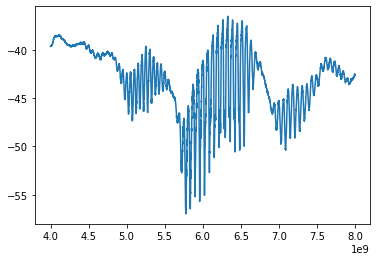

In [11]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data)

In [12]:
txt_filename = os.path.join(
        raw_path_dir,
        (str(run_id) + '_' + str(exp_name) + "_" +
         '__power_idx_' + str(specific_power_idx) + "_val_" + "{:.2e}".format(specific_power) + "__" +
         str.split(key_x, "_")[-1] + "_" + str.split(key_y, "_")[-1] + 
         '.txt'))

print(txt_filename)

C:\Users\nanospin\Nextcloud\Lab-Shared\measurements\Data\20-12_LNOS_DL3_110D_10cells\Transmission_cold_power_sweep\raw\90_Transmission_cold_power_sweep___power_idx_3_val_0.00e+00__frequency_magnitude.txt


In [13]:
print(np.vstack((x_data, y_data)).T)

[[ 4.00000000e+09 -3.96515312e+01]
 [ 4.00100000e+09 -3.96697922e+01]
 [ 4.00200000e+09 -3.96644592e+01]
 ...
 [ 7.99800000e+09 -4.26748505e+01]
 [ 7.99900000e+09 -4.26583061e+01]
 [ 8.00000000e+09 -4.25905380e+01]]


In [14]:
np.savetxt(txt_filename, np.vstack((x_data, y_data)).T)